#Data cleaning, aka data cleansing, is an integral part of data preparation. if your Data is dirty corrupt, incorrect, or unnecessary then you will not have a good analysis. If you want to go into the modern market then you are not going to succeed. that's why Data cleaning is the most important process of correcting or removing corrupt, incorrect, or unnecessary data from a data set before data analysis.



#import the necessary libraries *Numpy, Pandas, Matploilib, Seaborn*

###### **Numpy**: NumPy is a Numerical Python Library that helps perform mathematical operations.
###### **Pandas**: Panda is an open-source library that helps understand relational or labelled data.
###### **Matplotlib**: Matplotlip is a Python visualization library that helps visualize 2D array plots.
###### **Seaborn**: Seaborn is a data visualization library built on top of matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load Data Set 
data=pd.read_csv("/content/drive/MyDrive/Flyzy/Review.csv")

#First I will show the Top five rows to help with the Head() method.

In [ ]:
data.head()

,sentiment_polarity,sentiment_polarity_confidence,negative_reason,negativereason_confidence,airline_name,airline_sentiment_gold,name,negativereason_gold,retweet_count,Review,tweet_coord,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/15 11:15,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/15 11:15,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/15 11:14,NaN,Pacific Time (US & Canada)


###As you can see in the “Customer Reviews” dataset some Attributes are present. then I will examine. 

## Next, I used info () method and show information about the DataFrame. The information contains the number of columns, column labels, data types, memory usage, and the number of cells in each column (non-null values).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sentiment_polarity             14640 non-null  object 
 1   sentiment_polarity_confidence  14640 non-null  float64
 2   negative_reason                9178 non-null   object 
 3   negativereason_confidence      10522 non-null  float64
 4   airline_name                   14640 non-null  object 
 5   airline_sentiment_gold         40 non-null     object 
 6   name                           14640 non-null  object 
 7   negativereason_gold            32 non-null     object 
 8   retweet_count                  14640 non-null  int64  
 9   Review                         14640 non-null  object 
 10  tweet_coord                    1019 non-null   object 
 11  tweet_created                  14640 non-null  object 
 12  tweet_location                 9907 non-null  

## Describe ()
The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution,

In [ ]:
#I want to do  summarize object field
data.describe(include='object')

,sentiment_polarity,negative_reason,airline_name,airline_sentiment_gold,name,negativereason_gold,Review,tweet_coord,tweet_created,tweet_location,user_timezone
count,14640,9178,14640,40,14640,32,14640,1019,14640,9907,9820
unique,3,10,6,3,7701,13,14427,832,6804,3081,85
top,negative,Customer Service Issue,United,negative,JetBlueNews,Customer Service Issue,@united thanks,"[0.0, 0.0]",22/02/15 14:22,"Boston, MA",Eastern Time (US & Canada)
freq,9178,2910,3822,32,63,12,6,164,11,157,3744


In [ ]:
data.describe()

,sentiment_polarity_confidence,negativereason_confidence,retweet_count
count,14640.000000,10522.000000,14640.000000
mean,0.900169,0.638298,0.082650
std,0.162830,0.330440,0.745778
min,0.335000,0.000000,0.000000
25%,0.692300,0.360600,0.000000
50%,1.000000,0.670600,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,44.000000


### After apply 'describe' function.then i see retweet count column data is high variance.

#Handle Duplicates values

###Before Remove Duplicate Values checkd Total Number Of Duplicate Values.

In [ ]:
Duplicate = data.duplicated().sum()
print("Total Number Of Duplicate Values = ", Duplicate)

Total Number Of Duplicate Values =  36


In [ ]:
data.drop_duplicates(subset=None,keep='first',inplace=True)

# After Remove Duplicate values check Data 

In [ ]:
data.shape

(14604, 14)

# Check Null Values

In [ ]:
#Check Null Values
data.isnull().sum()/data.shape[0]*100


sentiment_polarity                0.000000
sentiment_polarity_confidence     0.000000
negative_reason                  37.284306
negativereason_confidence        28.081348
airline_name                      0.000000
airline_sentiment_gold           99.726102
name                              0.000000
negativereason_gold              99.780882
retweet_count                     0.000000
Review                            0.000000
tweet_coord                      93.049849
tweet_created                     0.000000
tweet_location                   32.340455
user_timezone                    32.963572
dtype: float64

## Drop the data
I’ll have to drop only the missing values and keep the data in the entire columns variable because there are so many missing data points that it isn’t fit for analysis. then
I drop the missing values with the help  "Drop" function.


In [ ]:
#Store Missing values fields in one Variable.Because there is more then 50% missing values  present in field.
remove=['airline_sentiment_gold','negativereason_gold','tweet_coord']

In [ ]:
# The drop methode is used to remove field from any data set.
data.drop(remove,inplace =True, axis =1)

In [ ]:
data.isnull().sum()/data.shape[0]*100

sentiment_polarity                0.000000
sentiment_polarity_confidence     0.000000
negative_reason                  37.284306
negativereason_confidence        28.081348
airline_name                      0.000000
name                              0.000000
retweet_count                     0.000000
Review                            0.000000
tweet_created                     0.000000
tweet_location                   32.340455
user_timezone                    32.963572
dtype: float64

##Input missing data
Technically, the method described of filling in individual values standards is also a form of inputting missing data. When it comes to inputting missing data you can use "fillna" method using the code below or manually fill in the correct data.



In [ ]:
#imputing missing values
data["negative_reason"]=data["negative_reason"].fillna('No reson') # catgorical column.
data["tweet_location"]=data["tweet_location"].fillna(data["tweet_location"].mode()[0]) # catgorical column.
data["user_timezone"]=data["user_timezone"].fillna(data["user_timezone"].mode()[0]) # catgorical column.
data["negativereason_confidence"]=data["negativereason_confidence"].fillna(data["negativereason_confidence"].mean()) # Numerical Column.

#Check Catgorial Fields

In [ ]:
catgorical_col=data.select_dtypes(include=[object]).columns
print(catgorical_col)

Index(['sentiment_polarity', 'negative_reason', 'airline_name', 'name',
       'Review', 'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')


# Check of Count of Number of observation in each category field help with Countplot..
###Countplot is a Seaborn Visualization library for statistical Graphs. it function creates bar charts of the number of observations per category. then the length of the bars represents the count of the number of observations in each category.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

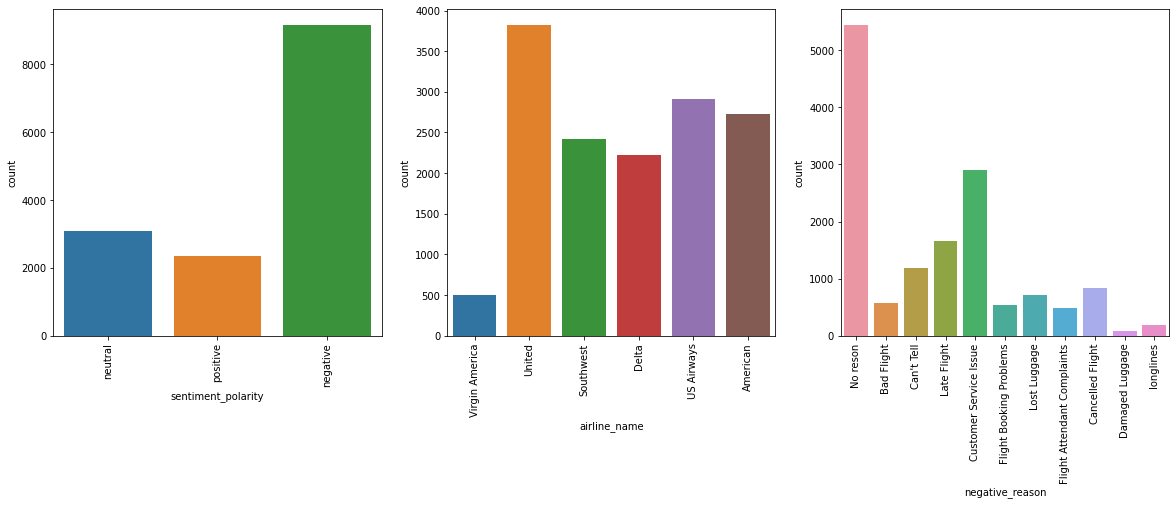

In [ ]:
plt.rcParams['figure.figsize']=(20,6)

plt.subplot(1,3,1)
sns.countplot(data['sentiment_polarity'])
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.countplot(data['airline_name'])
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
sns.countplot(data['negative_reason'])
plt.xticks(rotation = 90)


Also with the help of the count plot and i saw that the negative point in sentiment_polarity is high and second high point natural. because customers have given more negative reviews. and talking about 'airline _names' is more demand for United Airlines because customer has given good and positive reviews and 'virgin America' have not positive reviews. that's why virgin America is in low Demand. if seen 3rd one is negative_resion most of the customers have given No reason reviews Without reason because they have no reason if the second point is seen as Damaged Luggage Reviews are good because the customer's luggage did not damage.


In [ ]:
data["name"].value_counts()

JetBlueNews       63
kbosspotter       32
_mhertz           29
otisday           28
throthra          27
                  ..
ChrisJLeary        1
tracy_edes         1
NGottesman         1
chadlacalamita     1
sanyabun           1
Name: name, Length: 7701, dtype: int64

#Handling Special Characters & Symbols.

In [ ]:
# Create a Function for removing Special Characters & Symbols
import re
def remove_special(text):
  return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",text).split())

In [ ]:
#Check Review Field Values 
data["Review"][0]

'@VirginAmerica What @dhepburn said.'

In [ ]:
# Apply Function
data['Review']=data['Review'].apply(remove_special)

In [ ]:
data['Review'][0]

'VirginAmerica What dhepburn said'

In [ ]:
# Apply Function
data['name']=data['name'].apply(remove_special)

In [ ]:
data['name']

0                cairdin
1               jnardino
2             yvonnalynn
3               jnardino
4               jnardino
              ...       
14635    KristenReenders
14636           itsropes
14637           sanyabun
14638         SraJackson
14639          daviddtwu
Name: name, Length: 14604, dtype: object

In [ ]:
data.head()

,sentiment_polarity,sentiment_polarity_confidence,negative_reason,negativereason_confidence,airline_name,name,retweet_count,Review,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,No reson,0.637644,Virgin America,cairdin,0,VirginAmerica What dhepburn said,24/02/15 11:35,"Boston, MA",Eastern Time (US & Canada)
1,positive,0.3486,No reson,0.000000,Virgin America,jnardino,0,VirginAmerica plus youve added commercials to ...,24/02/15 11:15,"Boston, MA",Pacific Time (US & Canada)
2,neutral,0.6837,No reson,0.637644,Virgin America,yvonnalynn,0,VirginAmerica I didnt today Must mean I need t...,24/02/15 11:15,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.703300,Virgin America,jnardino,0,VirginAmerica its really aggressive to blast o...,24/02/15 11:15,"Boston, MA",Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.000000,Virgin America,jnardino,0,VirginAmerica and its a really big bad thing a...,24/02/15 11:14,"Boston, MA",Pacific Time (US & Canada)


My TASK :

First step is a sanity check of the data. Regardless of where you obtain your data, it is important
to do some sanity checks to ensure that nothing is drastically flawed. For instance, you can
check the minimum and maximum values of key input parameters (i.e., columns) of your data to
see if anything looks obviously wrong.

● Treat null values and duplicate values using appropriate techniques
● Prepare the data for text cleaning.


### I did perform EDA in this data set During that I found Null values, and Duplicated data, and then I handled clean missing values & duplicate values.I need to do some text cleaning because in this data set I found NAME, and REVIEW columns have some irrelevant values lake Number, Special Characters. 